In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda' if USE_CUDA else 'cpu')
print("다음기기 사용: ", device)

다음기기 사용:  cpu


In [3]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
training_epochs = 15
batch_size = 100

In [5]:
mnist_train = dsets.MNIST(root = 'MNIST_data/', 
                                                   train=True,
                                                   transform= transforms.ToTensor(),
                                                   download= True
                                                   )
mnist_test = dsets.MNIST(root='MNIST_data/',
                                                 train=False,
                                                 transform=transforms.ToTensor(),
                                                 download=True)

In [6]:
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

In [7]:
linear = nn.Linear(784, 10, bias=True).to(device)

In [8]:
crit = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(linear.parameters(), lr=0.1)

In [9]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        y_hat = linear(X)
        cost = crit(y_hat, Y)

        cost.backward()
        optimizer.step()
        avg_cost += cost/total_batch

    print('Epoch: ', epoch, 'Cost: ', avg_cost.item())
print("Learning finished")


Epoch:  0 Cost:  0.5351506471633911
Epoch:  1 Cost:  0.3595777451992035
Epoch:  2 Cost:  0.33126428723335266
Epoch:  3 Cost:  0.31640470027923584
Epoch:  4 Cost:  0.30710697174072266
Epoch:  5 Cost:  0.30045655369758606
Epoch:  6 Cost:  0.29493340849876404
Epoch:  7 Cost:  0.29095619916915894
Epoch:  8 Cost:  0.2870740592479706
Epoch:  9 Cost:  0.2845156192779541
Epoch:  10 Cost:  0.2819140553474426
Epoch:  11 Cost:  0.27952688932418823
Epoch:  12 Cost:  0.2776365876197815
Epoch:  13 Cost:  0.2758747935295105
Epoch:  14 Cost:  0.2744227945804596
Learning finished


Label: tensor([7, 2, 1,  ..., 4, 5, 6])
tensor([[ -749.8087,  -623.2756,  3327.7537,  1728.2899,  -433.2642, -1059.8983,
           269.4627, -3010.3523,  1510.8981, -1077.1912]])
Prediction:  2


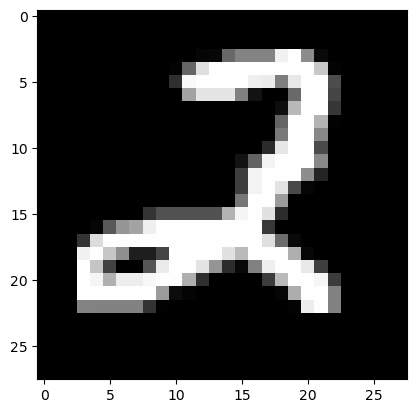

In [28]:
#여기서부터는 훈련이 다 끝났기때문에 gradient계산을 하지말라고 하는것
with torch.no_grad():
    x_test=mnist_test.test_data.view(-1, 28*28).float().to(device)
    y_test=mnist_test.test_labels.to(device)

    prediction=linear(x_test)
    correct_prediction=torch.argmax(prediction,1) == y_test
    accuracy=correct_prediction.float().mean() #정확도

    # print(torch.argmax(prediction,1))
    # print(y_test)    
    # print(correct_prediction)
    # print('Accuracy:', accuracy)


    r=random.randint(0, len(mnist_test)-1)
    x_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    y_single_data = mnist_test.test_labels.to(device)
    print('Label:',y_single_data)
    single_prediction=linear(x_single_data)
    print(single_prediction)
    print('Prediction: ', torch.argmax(single_prediction,1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='gray')

